In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [2]:
import numpy as np

In [3]:
(X_train,_),(X_test,_) = mnist.load_data()

In [4]:
# Noramlizing between -0.5 and 0.5
X_train = X_train.astype('float32')/255 - 0.5
X_test = X_test.astype('float32')/255 - 0.5

In [5]:
X_train = X_train
X_test = X_test

In [6]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Input, Reshape, Flatten

In [7]:
img_shape = X_train[0].shape

In [8]:
encoding_dim = 32

In [9]:
encoder = Sequential()
encoder.add(Input(img_shape))
encoder.add(Flatten())
encoder.add(Dense(encoding_dim))

In [10]:
decoder = Sequential()
decoder.add(Input(encoding_dim))
decoder.add(Dense(np.prod(img_shape)))
decoder.add(Reshape(img_shape))

In [11]:
input_ = Input(img_shape)

In [12]:
#Using Latent to get the output
bottleneck = encoder(input_)
reconstruction = decoder(bottleneck)

### If Using the AutoEncoder as a single model
But here, we can't use the latent variable for other operations
That's why we use encoder and decoder separately.

In [13]:
# While using the encoder and decoder at once
#Using a Single Dense Layer
autoencoder = Sequential()
autoencoder.add(Input(img_shape))
autoencoder.add(Flatten())
autoencoder.add(Dense(encoding_dim))
autoencoder.add(Dense(np.prod(img_shape)))
autoencoder.add(Reshape(img_shape))

In [14]:
#this is the input and output
autoencoder = Model(input_,reconstruction)

In [26]:
autoencoder.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['accuracy']
)

In [16]:
# Lets keep model checkpoints and callbacks
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard

In [17]:
checkpoints = ModelCheckpoint(
    filepath='model.h5',
    verbose=1,
    save_best_only=True #Best Model is saved on longer training
)

In [18]:
tb = TensorBoard(
    log_dir="./logs",
    write_graph=True
)

In [19]:
#Since we are reconstructing the same image the X and the Y are the same
history = autoencoder.fit(
    X_train,
    X_train,
    epochs=10,
    batch_size=256,
    shuffle=True,
    validation_data=(X_test,X_test),
    verbose=1,
    callbacks=[checkpoints, tb]
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
59136/60000 [============================>.] - ETA: 0s - loss: 0.0566 - accuracy: 0.1448
Epoch 00001: val_loss improved from inf to 0.03124, saving model to model.h5
60000/60000 [==============================] - 2s 31us/sample - loss: 0.0562 - accuracy: 0.1457 - val_loss: 0.0312 - val_accuracy: 0.2044
Epoch 2/10
59648/60000 [============================>.] - ETA: 0s - loss: 0.0265 - accuracy: 0.2276
Epoch 00002: val_loss improved from 0.03124 to 0.02211, saving model to model.h5
60000/60000 [==============================] - 1s 19us/sample - loss: 0.0265 - accuracy: 0.2276 - val_loss: 0.0221 - val_accuracy: 0.2396
Epoch 3/10
59392/60000 [============================>.] - ETA: 0s - loss: 0.0208 - accuracy: 0.2501
Epoch 00003: val_loss improved from 0.02211 to 0.01902, saving model to model.h5
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0208 - accuracy: 0.2502 - val_loss: 0.0190 - val_accuracy: 0.25

In [20]:
import matplotlib.pyplot as plt

In [21]:
def show(x):
    plt.imshow(np.clip(x+0.5,0,1))

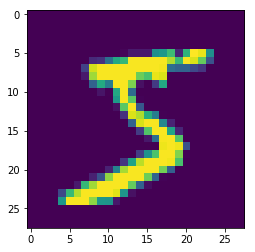

In [22]:
show(X_train[0])

In [23]:
#expects batch size show like 1*28*28 but we have not give a batch size so, we add none
autoencoder.predict(X_test[None][0])

array([[[-0.49607334, -0.49627385, -0.4961737 , ..., -0.4965054 ,
         -0.49626476, -0.4967671 ],
        [-0.49612638, -0.49636626, -0.4966966 , ..., -0.49644122,
         -0.4966285 , -0.49631315],
        [-0.49655724, -0.4963007 , -0.49629998, ..., -0.4962374 ,
         -0.49631476, -0.49644428],
        ...,
        [-0.49626088, -0.49619704, -0.49660873, ..., -0.4961579 ,
         -0.4966013 , -0.4961949 ],
        [-0.4965025 , -0.49661103, -0.4963137 , ..., -0.49616137,
         -0.4962073 , -0.49627808],
        [-0.4964912 , -0.4964354 , -0.49680358, ..., -0.49606547,
         -0.49644077, -0.4962737 ]],

       [[-0.4731566 , -0.47363222, -0.47357017, ..., -0.47337243,
         -0.47304094, -0.47385103],
        [-0.47346702, -0.4730119 , -0.47368586, ..., -0.4734965 ,
         -0.4735794 , -0.47358608],
        [-0.4737493 , -0.47275844, -0.47318432, ..., -0.4733204 ,
         -0.4733351 , -0.47356275],
        ...,
        [-0.47317904, -0.4734469 , -0.4734355 , ..., -

In [37]:
def visualize(img,encoder,decoder):
    bottleneck = encoder.predict(img[None])[0]
    print(bottleneck.shape)
    print(bottleneck[None].shape)
    reconstruction = decoder.predict(bottleneck[None])[0]
    
    plt.subplot(1,3,1)
    show(img)
    
    plt.subplot(1,3,2)
    plt.imshow(bottleneck.reshape((bottleneck.shape[-1],1)))
    
    plt.subplot(1,3,3)
    plt.imshow(reconstruction)
    
    plt.show()
    

(32,)
(1, 32)


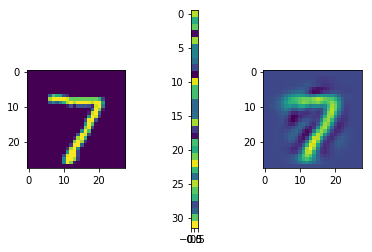

(32,)
(1, 32)


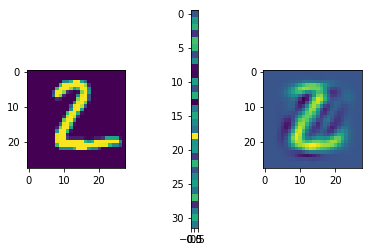

(32,)
(1, 32)


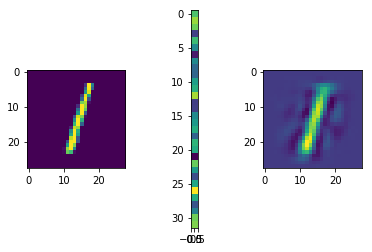

(32,)
(1, 32)


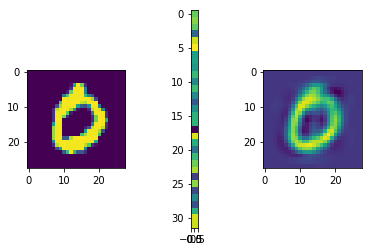

(32,)
(1, 32)


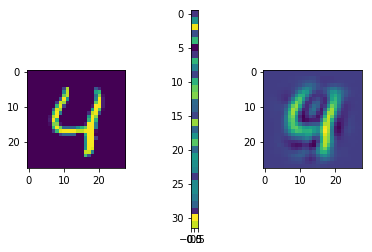

In [38]:
for i in range(5):
    img = X_test[i]
    visualize(img,encoder,decoder)